# Comparing KNN against OLS for the 2014 New York crime data:

In [63]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import linear_model

sns.set_style('white')

In [3]:
data_raw = pd.read_csv(open('New_York_by_City_2014.csv','rU'), encoding='utf-8', engine='c')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [4]:
data_raw

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,851",0,0.0,NaN,0.0,0,0,11,1,10,0,0.0,NaN
1,Addison Town and Village,"2,568",2,0.0,NaN,0.0,1,1,49,1,47,1,0.0,NaN
2,Afton Village4,820,0,0.0,0,NaN,0,0,1,0,1,0,0.0,NaN
3,Akron Village,"2,842",1,0.0,NaN,0.0,0,1,17,0,17,0,0.0,NaN
4,Albany4,"98,595",802,8.0,54,NaN,237,503,"3,888",683,"3,083",122,12.0,NaN
5,Albion Village4,"5,872",26,0.0,3,NaN,2,21,204,41,159,4,0.0,NaN
6,Alexandria Bay Village4,"1,107",0,0.0,0,NaN,0,0,7,2,5,0,0.0,NaN
7,Alfred Village4,"4,032",11,1.0,1,NaN,0,9,30,6,24,0,0.0,NaN
8,Altamont Village4,"1,723",1,0.0,0,NaN,0,1,2,2,0,0,0.0,NaN
9,Amherst Town4,"118,860",128,1.0,16,NaN,43,68,"2,066",176,"1,846",44,2.0,NaN


In [5]:
data_clean = data_raw.rename(str.lower, axis='columns')

In [6]:
# Drop the useless "Unnamed: 13" column

data_clean = data_raw.drop(columns='Unnamed: 13')

In [17]:
data_clean = data_raw.rename(index=str, columns={'City': 'city', 'Population': 'population', 'Robbery': 'robbery', 
                                    'Violent\ncrime': 'violent_crime', 'Murder and\nnonnegligent\nmanslaughter': 'murder',
                                   'Rape\n(revised\ndefinition)1': 'rape1', 'Rape\n(legacy\ndefinition)2': 'rape2',
                                   'Aggravated\nassault': 'aggravated_assault','Property\ncrime': 'property_crime',
                                   'Burglary': 'burglary', 'Arson3': 'arson', 'Larceny-\ntheft': 'larceny_theft',
                                    'Motor\nvehicle\ntheft':'vehicle_theft'}).drop(columns='Unnamed: 13')

In [18]:
data_clean


,city,population,violent_crime,murder,rape1,rape2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,vehicle_theft,arson
0,Adams Village,"1,851",0,0.0,NaN,0.0,0,0,11,1,10,0,0.0
1,Addison Town and Village,"2,568",2,0.0,NaN,0.0,1,1,49,1,47,1,0.0
2,Afton Village4,820,0,0.0,0,NaN,0,0,1,0,1,0,0.0
3,Akron Village,"2,842",1,0.0,NaN,0.0,0,1,17,0,17,0,0.0
4,Albany4,"98,595",802,8.0,54,NaN,237,503,"3,888",683,"3,083",122,12.0
5,Albion Village4,"5,872",26,0.0,3,NaN,2,21,204,41,159,4,0.0
6,Alexandria Bay Village4,"1,107",0,0.0,0,NaN,0,0,7,2,5,0,0.0
7,Alfred Village4,"4,032",11,1.0,1,NaN,0,9,30,6,24,0,0.0
8,Altamont Village4,"1,723",1,0.0,0,NaN,0,1,2,2,0,0,0.0
9,Amherst Town4,"118,860",128,1.0,16,NaN,43,68,"2,066",176,"1,846",44,2.0


In [19]:
data_clean['pop_num'] = pd.to_numeric(data_clean['population'].str.replace(',',''))
data_clean['pop_squared']=data_clean['pop_num']**2
data_clean['murder_cat'] = np.where((data_clean['murder'] > 0),1,0)

In [20]:
data_clean['robbery_num'] = pd.to_numeric(data_clean['robbery'].str.replace(',',''))
data_clean['robbery_cat'] = np.where((data_clean['robbery_num'] > 0),1,0)

In [21]:
data_clean['burglary'] = pd.to_numeric(data_clean['burglary'].str.replace(',',''))

In [22]:
data_clean['violent_crime'] = pd.to_numeric(data_clean['violent_crime'].str.replace(',',''))
data_clean['larceny_theft'] = pd.to_numeric(data_clean['larceny_theft'].str.replace(',',''))
data_clean['vehicle_theft'] = pd.to_numeric(data_clean['vehicle_theft'].str.replace(',',''))

In [23]:
data_clean['aggravated_assault'] = pd.to_numeric(data_clean['aggravated_assault'].str.replace(',',''))
data_clean['property_crime'] = pd.to_numeric(data_clean['property_crime'].str.replace(',',''))

In [24]:
data_clean['rape1'] = pd.to_numeric(data_clean['rape1'].str.replace(',',''))

In [25]:
data_clean.dtypes

city                   object
population             object
violent_crime         float64
murder                float64
rape1                 float64
rape2                 float64
robbery                object
aggravated_assault    float64
property_crime        float64
burglary              float64
larceny_theft         float64
vehicle_theft         float64
arson                 float64
pop_num               float64
pop_squared           float64
murder_cat              int64
robbery_num           float64
robbery_cat             int64
dtype: object

In [26]:
data_all_numeric = data_clean[:-7]

In [38]:
data_all_numeric

,city,population,violent_crime,murder,rape1,rape2,robbery,aggravated_assault,property_crime,burglary,...,pop_squared,murder_cat,robbery_num,robbery_cat,pc_violent_crime,pc_murder,pc_rape1,pc_rape2,pc_aggravated_assault,pc_property_crime
0,Adams Village,"1,851",0.0,0.0,NaN,0.0,0,0.0,11.0,1.0,...,3.426201e+06,0,0.0,0,0.000000,0.000000,NaN,0.0,0.000000,0.005943
1,Addison Town and Village,"2,568",2.0,0.0,NaN,0.0,1,1.0,49.0,1.0,...,6.594624e+06,0,1.0,1,0.000779,0.000000,NaN,0.0,0.000389,0.019081
2,Afton Village4,820,0.0,0.0,0.0,NaN,0,0.0,1.0,0.0,...,6.724000e+05,0,0.0,0,0.000000,0.000000,0.000000,NaN,0.000000,0.001220
3,Akron Village,"2,842",1.0,0.0,NaN,0.0,0,1.0,17.0,0.0,...,8.076964e+06,0,0.0,0,0.000352,0.000000,NaN,0.0,0.000352,0.005982
4,Albany4,"98,595",802.0,8.0,54.0,NaN,237,503.0,3888.0,683.0,...,9.720974e+09,1,237.0,1,0.008134,0.000081,0.000548,NaN,0.005102,0.039434
5,Albion Village4,"5,872",26.0,0.0,3.0,NaN,2,21.0,204.0,41.0,...,3.448038e+07,0,2.0,1,0.004428,0.000000,0.000511,NaN,0.003576,0.034741
6,Alexandria Bay Village4,"1,107",0.0,0.0,0.0,NaN,0,0.0,7.0,2.0,...,1.225449e+06,0,0.0,0,0.000000,0.000000,0.000000,NaN,0.000000,0.006323
7,Alfred Village4,"4,032",11.0,1.0,1.0,NaN,0,9.0,30.0,6.0,...,1.625702e+07,1,0.0,0,0.002728,0.000248,0.000248,NaN,0.002232,0.007440
8,Altamont Village4,"1,723",1.0,0.0,0.0,NaN,0,1.0,2.0,2.0,...,2.968729e+06,0,0.0,0,0.000580,0.000000,0.000000,NaN,0.000580,0.001161
9,Amherst Town4,"118,860",128.0,1.0,16.0,NaN,43,68.0,2066.0,176.0,...,1.412770e+10,1,43.0,1,0.001077,0.000008,0.000135,NaN,0.000572,0.017382


In [42]:
data_all_numeric['pc_violent_crime'] = (data_all_numeric.loc[:,'violent_crime']/data_all_numeric.loc[:,'pop_num'])



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
data_all_numeric.loc[:,'pc_aggravated_assault'] = (data_all_numeric.loc[:,'aggravated_assault']/data_all_numeric.loc[:,'pop_num'])
data_all_numeric.loc[:,'pc_property_crime'] = (data_all_numeric.loc[:,'property_crime']/data_all_numeric.loc[:,'pop_num'])


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [44]:
data_all_numeric.dtypes


city                      object
population                object
violent_crime            float64
murder                   float64
rape1                    float64
rape2                    float64
robbery                   object
aggravated_assault       float64
property_crime           float64
burglary                 float64
larceny_theft            float64
vehicle_theft            float64
arson                    float64
pop_num                  float64
pop_squared              float64
murder_cat                 int64
robbery_num              float64
robbery_cat                int64
pc_violent_crime         float64
pc_murder                float64
pc_rape1                 float64
pc_rape2                 float64
pc_aggravated_assault    float64
pc_property_crime        float64
dtype: object

In [45]:
knn_df = pd.DataFrame()

In [46]:
knn_df['aggravated_assault'] = data_all_numeric['pc_aggravated_assault']
knn_df['violent_crime'] = data_all_numeric['pc_violent_crime']
knn_df['population'] = data_all_numeric['pop_num']

In [48]:
knn_df['property_crime'] = data_all_numeric['pc_property_crime']

In [49]:
knn_df.dtypes

aggravated_assault    float64
violent_crime         float64
population            float64
property_crime        float64
dtype: object

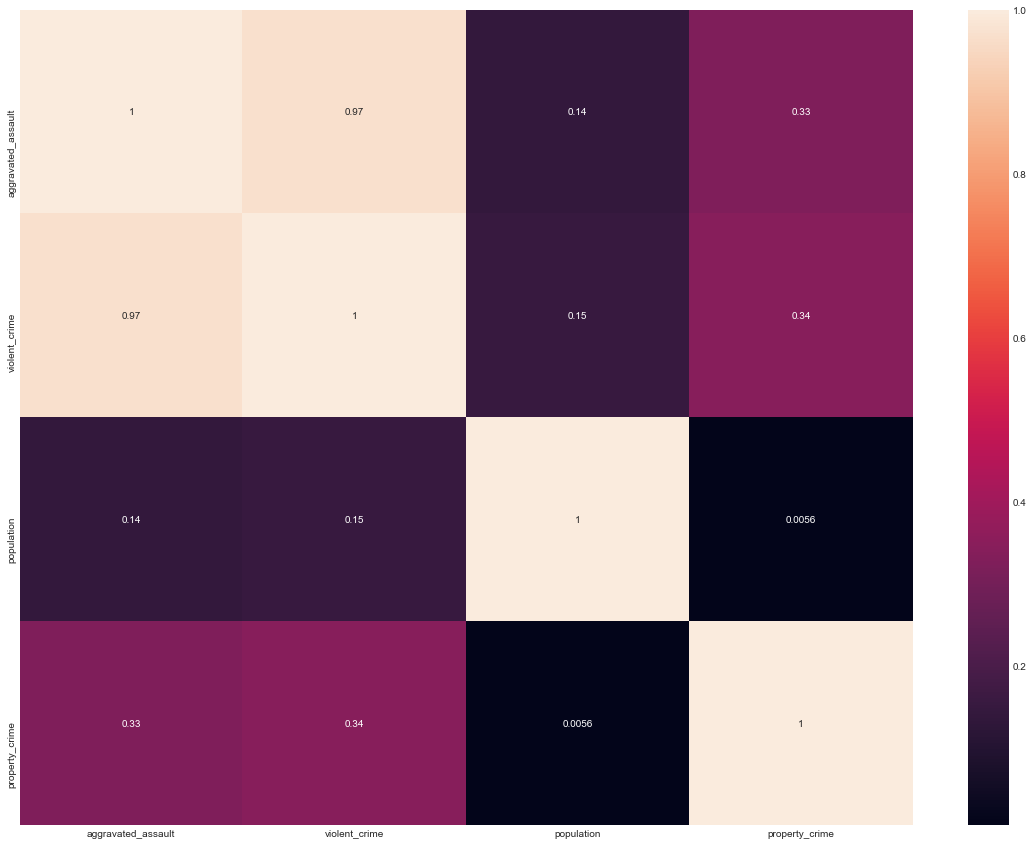

In [50]:
plt.subplots(figsize=(20,15))
sns.heatmap(knn_df.corr(), annot=True)

In [51]:
knn_df = knn_df.dropna(axis=0, how='any')

In [52]:
knn_df.shape[0]

368

In [114]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=75)
X = knn_df[['aggravated_assault', 'violent_crime']]  # df
Y = knn_df['property_crime'] # series- convert to a different shape
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=75, p=2,
          weights='uniform')

In [115]:
# Set up our prediction line.
T = pd.DataFrame()

T['aggravated_assault'] = np.arange(0, knn_df.shape[0], 1)
T['violent_crime'] = np.arange(0, knn_df.shape[0], 1)

In [116]:
# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(X)  # Y_ prediction, rather than data

In [121]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=15)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.29 (+/- 0.32)


In [122]:
print(score)
# These are ratios, the squared error. Aiming to be close to 1.

[ 0.50610541  0.49919112  0.20614398  0.06364514  0.40329307  0.25080814
  0.29481717  0.31468843  0.13826596 -0.08150151  0.31609878  0.18759065
  0.46018958  0.39982349  0.32073608]


# Now, trying Linear Regression

In [60]:
prep_df = data_all_numeric.loc[:,['pc_property_crime','pc_violent_crime','pc_aggravated_assault']].dropna(axis=0, how='any')

In [61]:
prep_df.shape

(368, 3)

In [65]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()

Y = prep_df['pc_property_crime'].values.reshape(-1, 1)
X = prep_df.loc[:,['pc_violent_crime','pc_aggravated_assault']]
regr.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
# Inspect the results.
print('\nCoefficients: pc_violent_crime, pc_aggravated_assault, pc_murder \n' , regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: pc_violent_crime, pc_aggravated_assault, pc_murder 
 [[ 4.50116038 -1.72850733]]

Intercept: 
 [0.01248596]

R-squared:
0.11907413275787193


The KNN model did work better overall. I wonder if this is because of the nature of New York's demography, when compared to states that are very different (for example, North Dakota, which has a more consistent, rural demographic with fewer outliers). 

For the best results, I created a KNN model with 75 nearest neighbors, and fifteen folds. This resulted in the following Unweighted Accuracy: 0.29 (+/- 0.32). There was fairly high variance amongst the scores, when cv = 15, but five of the fifteen were nearly .4 or higher, and only two values were within +/- .1 of 0. This can be explained by large cities in New York that act as outliers and behave very differently from cities and towns, overall.

The R^2 value for the linear regression was .119. This isn't as high as most of the KNN values, so the KNN model is more accuate, overall, at this time. This .119 value was similar to the scores for two of the fifteen tests, so one can see how this accuracy could reflect some of the data, but not the majority. 